# **APARTAT 1**

A partir d'aquestes dades, anam a treballar amb Python (i les llibreries que vulguis) per extreure algunes dades estadístiques. Has de crear un quadern de Jupyter o Colab on has d'obtenir els següents indicadors, sempre distingint entre els allotjaments amb llicència i sense:

    Valors mínim i màxim i histograma de cada una de les dues variables. Si l'histograma no mostra bé la informació, genera'n un altre que se centri en l'interval més significatiu (perquè concentri la majoria de dades).
    Mitjana, moda, mediana i percentils 25 i 75 de cada variable
    Desviació estàndard i variància de cada variable
    Gràfica de punts per poder analitzar si hi ha relacions lineals entre les dues variables
    Coeficient de correlació de Pearson entre les dues possibles

Recorda que cada un dels 5 punts els has de fer de manera separada per als allotjaments amb llicència i per als sense llicència.

Per a cada un d'aquests punts, crea almenys 3 cel·les en el quadern: una amb l'enunciat, una (o més) amb el codi i una darrera comentant detalladament els resultats que has obtingut, explicant tot el que sigui rellevant. Entre d'altres, comenta si hi ha diferències entre els dos tipus d'allotjaments (amb i sense llicència).

In [114]:
import pandas as pd
import numpy as np

url = "https://data.insideairbnb.com/spain/islas-baleares/menorca/2024-06-30/visualisations/listings.csv"
df = pd.read_csv(url)

df.head()
df.info()

# Separarem les dades entre llicensiades i no llicensiades
licensed_df = df[df['license'].notna()]
unlicensed_df = df[df['license'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4080 non-null   int64  
 1   name                            4080 non-null   object 
 2   host_id                         4080 non-null   int64  
 3   host_name                       4080 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   4080 non-null   object 
 6   latitude                        4080 non-null   float64
 7   longitude                       4080 non-null   float64
 8   room_type                       4080 non-null   object 
 9   price                           3956 non-null   float64
 10  minimum_nights                  4080 non-null   int64  
 11  number_of_reviews               4080 non-null   int64  
 12  last_review                     31

En aquest cas llegim les dades directament del csv i pasarem un parell de funcions per comprovar visualment si està funcionant i quantes dades hi ha.

# **Valors mínim i màxim i histograma de cada una de les dues variables. Si l'histograma no mostra bé la informació, genera'n un altre que se centri en l'interval més significatiu (perquè concentri la majoria de dades).**

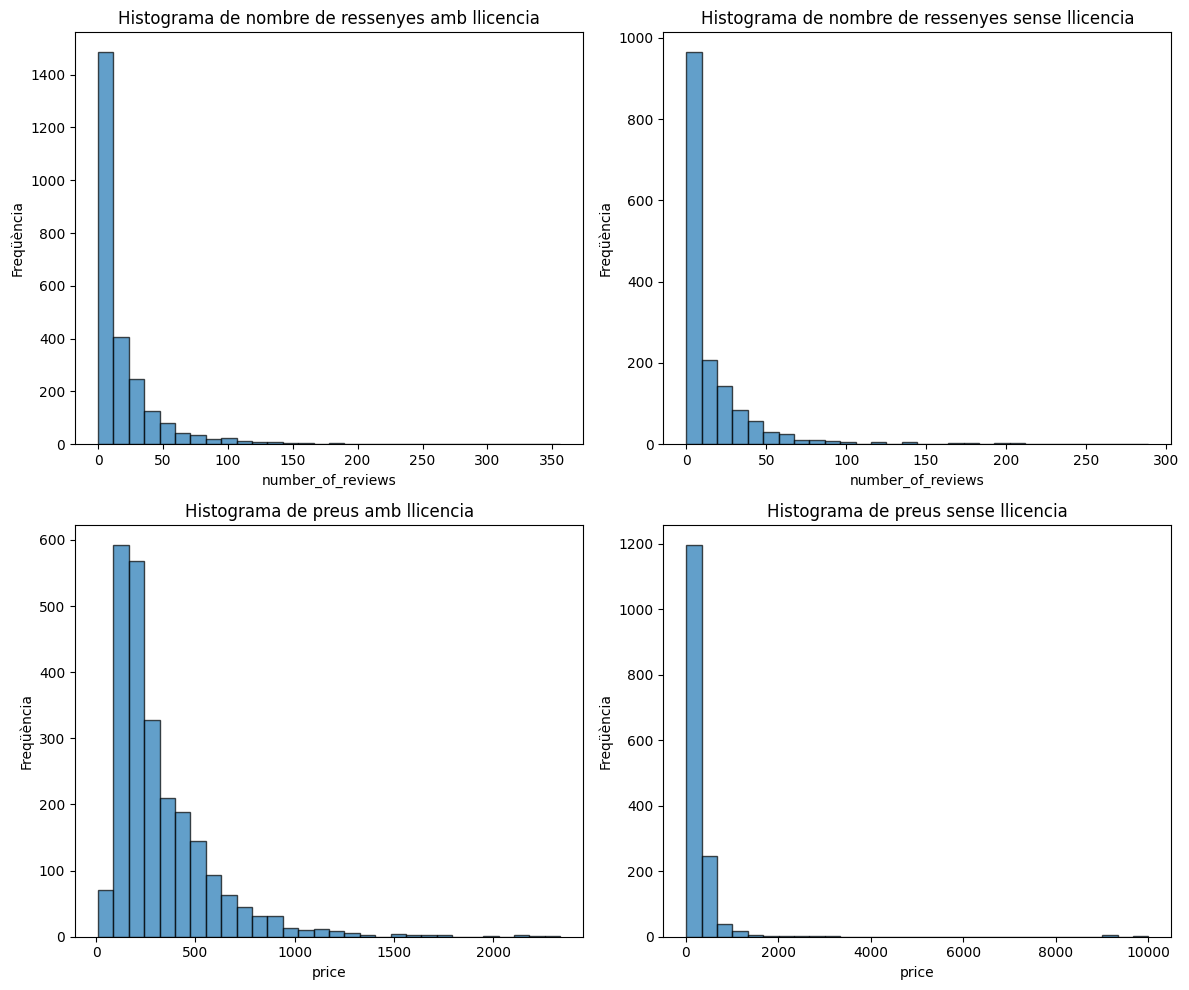

In [115]:
import matplotlib.pyplot as plt

# Funció per mostrar histograma d'una variable en un subplot específic
def plot_histogram(ax, data, variable, title):
    ax.hist(data[variable], bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(variable)
    ax.set_ylabel('Freqüència')

# Variables d'exemple - Substituïu amb columnes numèriques reals del vostre DataFrame
variable1 = 'number_of_reviews'
variable2 = 'price'

# Creem una figura amb una graella 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogramas per a allotjaments amb llicència
plot_histogram(axs[0, 0], licensed_df, variable1, 'Histograma de nombre de ressenyes amb llicencia')
plot_histogram(axs[1, 0], licensed_df, variable2, 'Histograma de preus amb llicencia')

# Histogramas per a allotjaments sense llicència
plot_histogram(axs[0, 1], unlicensed_df, variable1, 'Histograma de nombre de ressenyes sense llicencia')
plot_histogram(axs[1, 1], unlicensed_df, variable2, 'Histograma de preus sense llicencia')

# Ajustar l'espai entre els subplots per a una millor visualització
plt.tight_layout()
plt.show()

Podem analitzar varies coses. Per exemple, els preus amb llicencia estan molt més repartits, mentre que els sense llicencia estan molt menys distribuits pero solen ser en general més cars. Això pot ser per la quantitat de allotjaments de cada un dels filtres.



# **Mitjana, moda, mediana i percentils 25 i 75 de cada variable**

In [116]:
def descriptive_statistics(data, variable):
    mean = data[variable].mean()
    median = data[variable].median()
    mode = data[variable].mode()[0]  # Agafem el primer valor en cas de múltiples modes
    data[variable] = data[variable].fillna(0)
    percentile_25 = np.percentile(data[variable], 25)
    percentile_75 = np.percentile(data[variable], 75)
    return mean, median, mode, percentile_25, percentile_75

variable1 = 'number_of_reviews'
variable2 = 'price'

# Mostra els resultats per a cada variable amb i sense llicència
print("Estadístiques per allotjaments amb llicència")
print("Variable 1:", descriptive_statistics(licensed_df, variable1))
print("Variable 2:", descriptive_statistics(licensed_df, variable2))

print("\nEstadístiques per allotjaments sense llicència")
print("Variable 1:", descriptive_statistics(unlicensed_df, variable1))
print("Variable 2:", descriptive_statistics(unlicensed_df, variable2))

Estadístiques per allotjaments amb llicència
Variable 1: (17.75528098844161, 7.0, 0, 1.0, 23.0)
Variable 2: (324.31565967940816, 240.0, 200.0, 154.0, 411.0)

Estadístiques per allotjaments sense llicència
Variable 1: (15.29662635264163, 5.0, 0, 1.0, 20.0)
Variable 2: (320.43138542350624, 191.0, 120.0, 134.0, 300.0)


<ipython-input-116-92155c2337af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable] = data[variable].fillna(0)
<ipython-input-116-92155c2337af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable] = data[variable].fillna(0)


# **Desviació estàndard i variància de cada variablea**

In [117]:
def variance_std(data, variable):
    variance = data[variable].var()
    std_dev = data[variable].std()
    return variance, std_dev

variable1 = 'number_of_reviews'
variable2 = 'price'

# Mostra els resultats per a cada variable amb i sense llicència
print("Desviació estàndard i variància per allotjaments amb llicència")
print("Nombre de ressenyes:", variance_std(licensed_df, variable1))
print("Preu:", variance_std(licensed_df, variable2))

print("\nDesviació estàndard i variància per allotjaments sense llicència")
print("Nombre de ressenyes:", variance_std(unlicensed_df, variable1))
print("Preu:", variance_std(unlicensed_df, variable2))

Desviació estàndard i variància per allotjaments amb llicència
Nombre de ressenyes: (830.5924013265283, 28.82000002301402)
Preu: (64197.31781598999, 253.37189626316095)

Desviació estàndard i variància per allotjaments sense llicència
Nombre de ressenyes: (718.8469886112649, 26.811322022818363)
Preu: (543646.8481019427, 737.3241133327614)


Nombre de ressenyes:
Els allotjaments amb llicència tenen una desviació estàndard de 830,59 i una variància de 28,82. Els allotjaments sense llicència tenen una desviació estàndard de 718,85 i una variància de 26,81. Això indica una dispersió lleugerament més gran en les ressenyes dels allotjaments amb llicència en comparació amb els sense llicència, però la diferència no és molt significativa.

Preu: Els allotjaments amb llicència tenen una desviació estàndard de 64197,32
i una variància de 253,37, mentre que els allotjaments sense llicència tenen una desviació estàndard de 54364,85 i una variància de 737,32. Això mostra una major variabilitat en els preus dels allotjaments amb llicència en comparació amb els sense llicència, especialment per la desviació estàndard.

En resum, els allotjaments amb llicència presenten una major variabilitat tant en el nombre de ressenyes com en el preu, indicant una dispersió més gran en aquestes característiques en comparació amb els allotjaments sense llicència.




# **Gràfica de punts per poder analitzar si hi ha relacions lineals entre les dues variables**

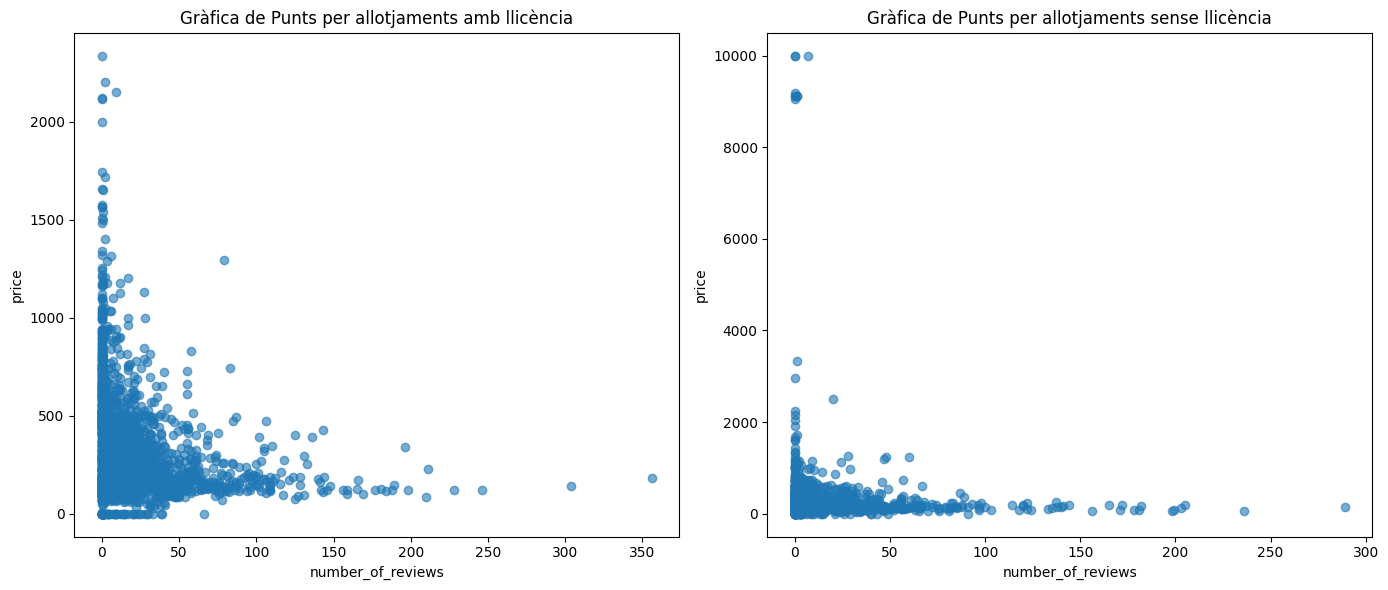

In [118]:
# Variables d'exemple - Substituïu amb columnes numèriques reals del vostre DataFrame
variable1 = 'number_of_reviews'
variable2 = 'price'

# Creem una figura amb una graella 1x2
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gràfica de punts per allotjaments amb llicència
axs[0].scatter(licensed_df[variable1], licensed_df[variable2], alpha=0.6)
axs[0].set_title('Gràfica de Punts per allotjaments amb llicència')
axs[0].set_xlabel(variable1)
axs[0].set_ylabel(variable2)

# Gràfica de punts per allotjaments sense llicència
axs[1].scatter(unlicensed_df[variable1], unlicensed_df[variable2], alpha=0.6)
axs[1].set_title('Gràfica de Punts per allotjaments sense llicència')
axs[1].set_xlabel(variable1)
axs[1].set_ylabel(variable2)

# Ajustar l'espai entre els subplots per a una millor visualització
plt.tight_layout()
plt.show()



Allotjaments amb llicència (gràfica de l’esquerra): La major part dels allotjaments es concentra en rangs baixos de ressenyes (menys de 50) i preus (menys de 500). Tot i això, hi ha alguns punts dispersos cap a la dreta (fins a 350 ressenyes) i cap amunt (fins a 2500 en preu), indicant alguns allotjaments amb més ressenyes i/o preus més alts.

Allotjaments sense llicència (gràfica de la dreta): També es veu una concentració en valors baixos de ressenyes i preus, però amb alguns allotjaments que tenen preus molt més alts (fins a 10000). Això suggereix que, tot i que molts allotjaments sense llicència són econòmics, hi ha alguns casos amb preus força elevats.

En general, les dues gràfiques mostren una tendència similar: a mesura que augmenta el nombre de ressenyes, el preu tendeix a disminuir, però amb excepcions. La presència de punts més elevats en la gràfica sense llicència suggereix una major variabilitat en el preu d’aquests allotjaments.

# **Coeficient de correlació de Pearson entre les dues possibles**

In [119]:
# Coeficient de correlació de Pearson
variable1 = 'number_of_reviews'
variable2 = 'price'

licensed_correlation = licensed_df[[variable1, variable2]].corr().iloc[0, 1]
unlicensed_correlation = unlicensed_df[[variable1, variable2]].corr().iloc[0, 1]

print("Coeficient de correlació de Pearson:")
print("Amb llicència:", licensed_correlation)
print("Sense llicència:", unlicensed_correlation)

Coeficient de correlació de Pearson:
Amb llicència: -0.2031840636335429
Sense llicència: -0.08456978311788603


Amb llicència: El coeficient és de -0,20, la qual cosa indica una lleugera correlació negativa entre el nombre de ressenyes i el preu. Això suggereix que, per als allotjaments amb llicència, a mesura que augmenta el nombre de ressenyes, el preu tendeix a disminuir lleugerament.

Sense llicència: El coeficient és de -0,08, la qual cosa indica una correlació negativa encara més feble entre el nombre de ressenyes i el preu. Això suggereix que, per als allotjaments sense llicència, gairebé no hi ha una relació entre el nombre de ressenyes i el preu.

En general, ambdós tipus d’allotjaments mostren una lleugera tendència a la disminució del preu a mesura que augmenta el nombre de ressenyes, però aquesta relació és feble, especialment per als allotjaments sense llicència.